#                                                            Assignment 1: Covid Data

### This assignment focuses on bringing data into Python, exploring and visualizing data. You will need to install Python on your personal computer (Mac or Windows) prior to working on this assignment. See Python installation instructions under Modules / Technology Resources / Software for Practical Machine Learning (Python version).

As part of this assignment, you are asked to choose a variable with meaningful magnitude and examine the effects of two transformations (scaling methods) on that variable.

#### 
Using this data, you are to conduct exploratory data analysis.  Provide appropriate descriptive statistics  / visualizations to help understand the spread of the disease (incidence) as well as its fatality rate.  You should also engage in feature creation and variable transformation.  At a bare minimum, feature creation should include generating rates per X in the population (i.e., rates per million).  Investigate time series as well as univariate and bivariate distribution graphs. 

Select one of variable and perform both min-max and standard scaling in Python.  See https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py (Links to an external site.)

 (Some methods we will learn in this course  (trees and random forests) are unaffected by monotonic transformations of the explanatory variables. Others (SVMs and neural networks) are very much affected by scaling and usually perform better when all explanatory variables have the same scale. It is often best to use scaling methods that preserve the shape of the distribution. But if there are extreme outliers or heavily skewed distributions, then log or normalizing transformations may be warranted.)

## Deliverables:


### Import necessary libraries and data

In [22]:
import pandas as pd
import seaborn as sns
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler


CovidData = pd.read_csv("C:/Users/bblank/Documents/Northwestern MSDS/datasets/CovidData.csv")


In [23]:
CovidData.head()

Country= 'cuntriesAndTerritories'
CovidData.groupby('countriesAndTerritories').describe()

#this is all time series data.


cases_weekly                                         \
                               count         mean          std  min     25%   
countriesAndTerritories                                                       
Afghanistan                     54.0   992.296296  1283.826219  0.0  126.25   
Albania                         45.0  1413.222222  1663.387383  2.0  139.00   
Algeria                         54.0  1891.555556  1861.062759  0.0  624.25   
Andorra                         44.0   197.318182   229.949112  0.0    9.50   
Angola                          43.0   423.093023   469.509258  2.0   19.00   
...                              ...          ...          ...  ...     ...   
Wallis_and_Futuna               13.0     0.307692     0.480384  0.0    0.00   
Western_Sahara                  38.0    20.157895    68.990217  0.0    0.00   
Yemen                           40.0    52.700000    68.451068  0.0    4.00   
Zambia                          43.0   665.023256  1084.710242  3.0  132.00   
Zimbabwe                        43.0   499.465116   994.389939  2.0   75.50   

                                                 deaths_weekly             \
                            50%      75%     max         count       mean   
countriesAndTerritories                                                     
Afghanistan               496.5  1319.25  5137.0          54.0  42.611111   
Albania                   874.0  2045.00  5542.0          45.0  27.577778   
Algeria                  1291.5  3045.00  7359.0          54.0  51.981481   
Andorra                    89.5   300.50   787.0          44.0   1.954545   
Angola                    307.0   652.00  1779.0          43.0   9.674419   
...                         ...      ...     ...           ...        ...   
Wallis_and_Futuna           0.0     1.00     1.0          13.0   0.000000   
Western_Sahara              0.0     0.00   311.0          38.0   0.026316   
Yemen                      14.0    75.50   242.0          40.0  15.300000   
Zambia                    358.0   757.00  6603.0          43.0  10.953488   
Zimbabwe                  149.0   619.00  6212.0          43.0  11.790698   

                         ... popData2019              \
                         ...         75%         max   
countriesAndTerritories  ...                           
Afghanistan              ...  38041757.0  38041757.0   
Albania                  ...   2862427.0   2862427.0   
Algeria                  ...  43053054.0  43053054.0   
Andorra                  ...     76177.0     76177.0   
Angola                   ...  31825299.0  31825299.0   
...                      ...         ...         ...   
Wallis_and_Futuna        ...         NaN         NaN   
Western_Sahara           ...    582458.0    582458.0   
Yemen                    ...  29161922.0  29161922.0   
Zambia                   ...  17861034.0  17861034.0   
Zimbabwe                 ...  14645473.0  14645473.0   

                        notification_rate_per_100000_population_14-days  \
                                                                  count   
countriesAndTerritories                                                   
Afghanistan                                                        53.0   
Albania                                                            44.0   
Algeria                                                            53.0   
Andorra                                                            43.0   
Angola                                                             42.0   
...                                                                 ...   
Wallis_and_Futuna                                                   0.0   
Western_Sahara                                                     37.0   
Yemen                                                              39.0   
Zambia                                                             42.0   
Zimbabwe                                                           42.0   

  

## There are way too many countries here intiially let's work with a subset to explore; let's pick the Americas. And let's target weekly deaths.
    1) It looks like the data for  weekly deaths is quite noisy! Particularly the data for the USA (large popultion)
    

,dateRep,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days
2070,7/12/2020,2020-49,1373677,15437,United_States_of_America,US,USA,329064917.0,America,762.79
3482,4/1/2021,2020-53,1488563,18264,United_States_of_America,US,USA,329064917.0,America,849.49
3696,11/1/2021,2021-01,1782792,22852,United_States_of_America,US,USA,329064917.0,America,994.14
4599,14/12/2020,2020-50,1499756,16867,United_States_of_America,US,USA,329064917.0,America,873.21
6124,20/04/2020,2020-16,202116,18574,United_States_of_America,US,USA,329064917.0,America,128.26
6752,21/12/2020,2020-51,1588085,18493,United_States_of_America,US,USA,329064917.0,America,938.37
8953,28/12/2020,2020-52,1306812,15656,United_States_of_America,US,USA,329064917.0,America,879.73


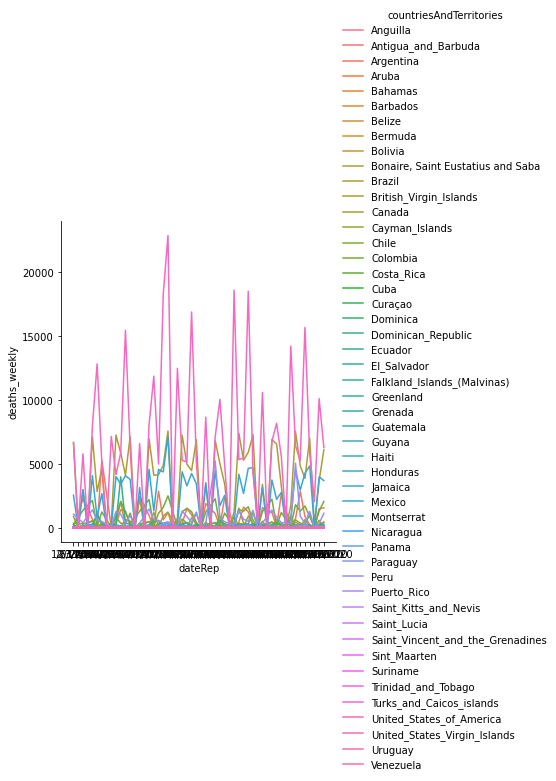

In [39]:
Americas = CovidData[CovidData['continentExp'] =='America']
sns.relplot(
    data=Americas,
    x="dateRep", y="deaths_weekly",
    hue="countriesAndTerritories", kind='line')

Americas[Americas['deaths_weekly'] > 15000 ]
    #wow, that USA data is particularly noisy 

    